In [5]:
from shared.preface import *
import shared.functions as fct
import shared.my_units as my

## Time Variable s

In [6]:
t = fct.s_of_z(4)
print(type(t), t)

<class 'numpy.float64'> -1.6550627417976567


## Unit Conversion Tests

In [7]:
print(my.T_nu.to(unit.eV, unit.temperature_energy()))

0.00016803799861183098 eV


## Derivative vector values

In [8]:
z = 0
x_i = np.array([1.,2.,3.])*unit.km

t2 = fct.dPsi_dxi_NFW(x_i, z, my.rho0_NFW, my.Mvir_NFW)
print(type(t2), t2)

<class 'astropy.units.quantity.Quantity'> [-14867.28345853 -29734.56691707 -44601.8503756 ] kpc / s2


## Fermi-Dirac plot and Initial Momentum Tests

In [9]:
# Ringwald & Wong (2004) take initial momentum values in the range
# 0.01 <= p/T_nu_0 <= 13 , covering more than 99.9% of the distribution.

# neutrino mass
m_nu = 0.05 * unit.eV  # in natural units
m_nu_kg = m_nu.to(unit.kg, unit.mass_energy())  # in SI units

u0 = 3000.*unit.km/unit.s
p0 = u0 * m_nu_kg

to_eV = 1/(5.3442883e-28)
p0 = p0.to(unit.kg*unit.m/unit.s).value * to_eV * unit.eV
print(p0)

0.0005003459267797823 eV


In [13]:
def convert_ratio(pT_ratio):

    T_in_eV = my.T_nu.to(unit.eV, unit.temperature_energy())
    conversion_unit = (1/5.3442883e-28) * const.k_B.value * T_in_eV.value

    return 1/(pT_ratio / conversion_unit)

print(convert_ratio(0.01))
print(convert_ratio(13.))

lower = 13*const.c
print(lower.to(unit.km/unit.s))

434.1111140007657
0.3339316261544352
3897301.954 km / s


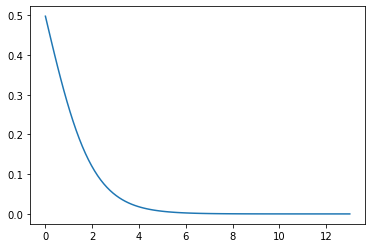

In [11]:
def FDplot(p_by_T):

    return 1 / (np.exp(p_by_T) + 1)

ratio_range = np.linspace(0.01,13,100)

plt.plot(ratio_range, FDplot(ratio_range))